In [ ]:
# Scenario: Predicting Student Exam Scores
# A school wants to build a model to predict student exam scores based on study hours. They collect data
# from 30 students, but the scores are noisy because of other factors (like sleep, stress, or health).
# They try two different models:
# - Linear Model (straight line) → very simple, assumes scores increase perfectly with study hours.
# - Polynomial Model (degree 10 curve) → very complex, tries to follow every bump in the data.

# Questions
# - Part A: If the linear model consistently predicts too low or too high compared to actual scores,
# what does this show about bias?
# - Part B: If the polynomial model fits the training data almost perfectly but gives very different predictions when tested on new students, what does this show about variance?
# - Part C: Which model is likely to generalize better to new students, and why?
# - Part D (Applied): How would you explain the difference between “high bias” and “high variance” to
#  a teacher who doesn’t know machine learning?

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [3]:
X=np.linspace(0,6,30).reshape(-1,1)
y=(10*np.sin(X).ravel()+np.random.normal(scale=3,size=30))

In [ ]:
#Define models
linear_model=make_pipeline(PolynomialFeatures(1),LinearRegression())
poly_model=make_pipeline(PolynomialFeatures(10),LinearRegression())
balanced_model=make_pipeline(PolynomialFeatures(3),LinearRegression())

In [4]:
#Fit model 
linear_model.fit(X,y)
poly_model.fit(X,y)
balanced_model.fit(X,y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [5]:
#Prediction
X_test=np.linspace(0,6,100).reshape(-1,1)
y_linear=linear_model.predict(X_test)
y_poly=poly_model.predict(X_test)
y_balanced=balanced_model.predict(X_test)


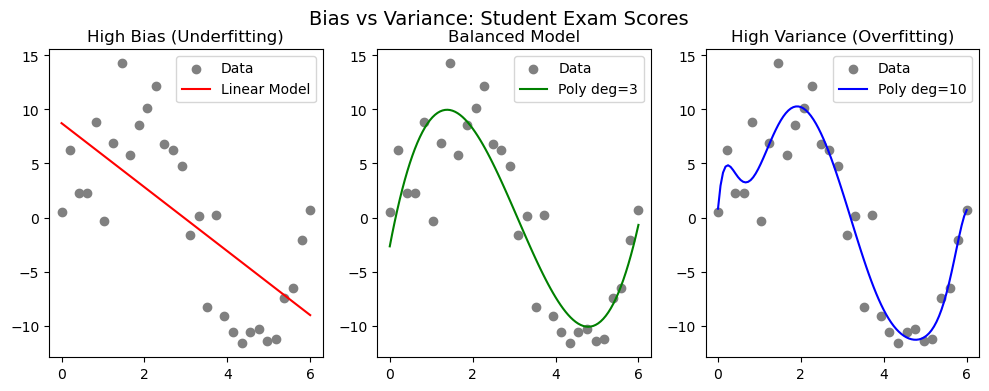

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_linear, color="red", label="Linear Model")
plt.title("High Bias (Underfitting)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_balanced, color="green", label="Poly deg=3")
plt.title("Balanced Model")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X_test, y_poly, color="blue", label="Poly deg=10")
plt.title("High Variance (Overfitting)")
plt.legend()

plt.suptitle("Bias vs Variance: Student Exam Scores", fontsize=14)
plt.show()